In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset 
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


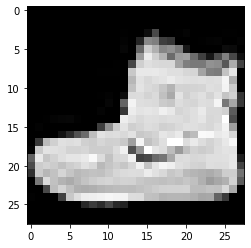

In [3]:
# Visualize a sample image
plt.imshow(x_train[0], cmap='gray')

In [4]:
# check out the shape of the training data

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
# check out the shape of the testing data

print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


# Class Labels

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

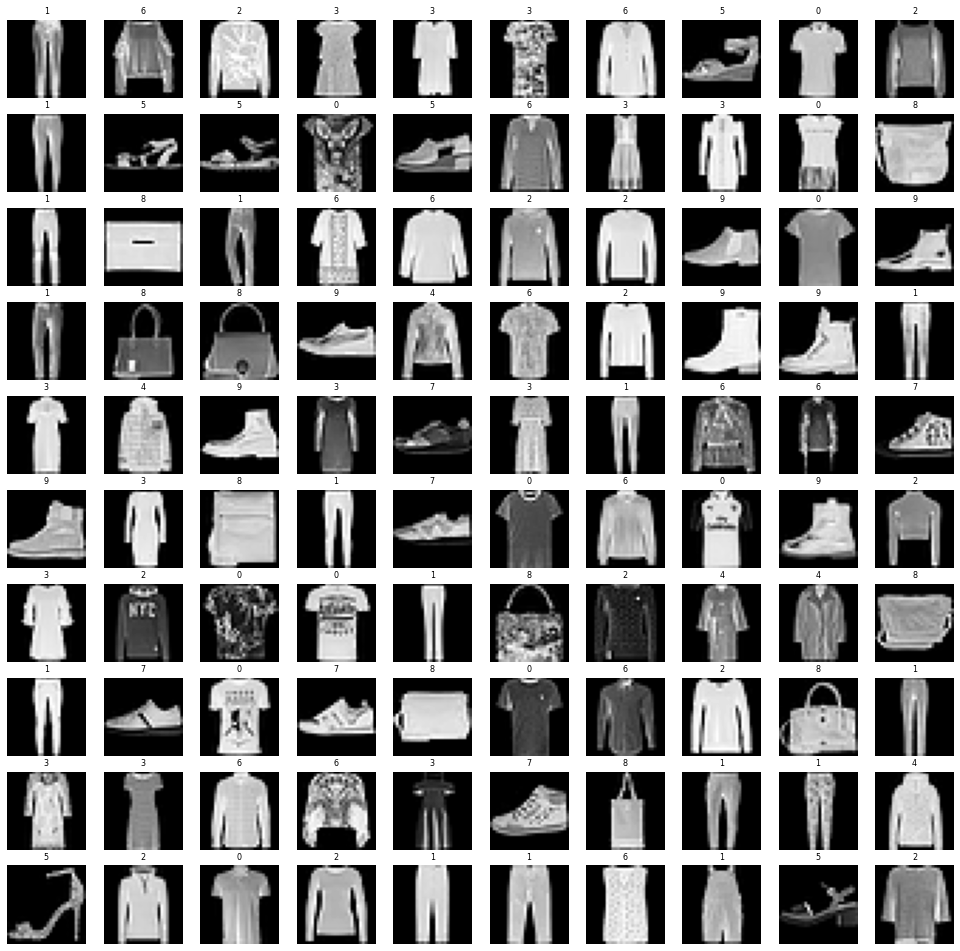

In [7]:
# Displaying some images with labels

grid_width  = 10
grid_height = 10



fig, axes = plt.subplots(grid_height, grid_width, figsize = (17,17))

axes = axes.ravel() 

n_train = len(x_train) 

for i in np.arange(0, grid_height * grid_width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(x_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis("off")



In [0]:
# Normalizing data
x_train = x_train/255.
x_test  = x_test/255. 

In [14]:
# print(x_train[1].shape)

(28, 28)


In [0]:
# Adding noise to train dataset
noise_factor = 0.2
noise_dataset_train = []

for img in x_train:
    noisy_img = img + noise_factor * np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_dataset_train.append(noisy_img)

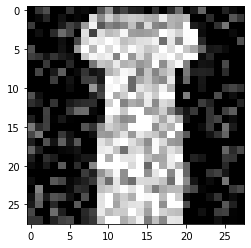

In [18]:
plt.imshow(noise_dataset[20], cmap = 'gray')

In [0]:
# Adding noise to test dataset
noise_dataset_test = []
for img in x_test:
    noisy_img = img + noise_factor * np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_dataset_test.append(noisy_img)

In [0]:
noise_dataset_train = np.array(noise_dataset_train)
noise_dataset_test  = np.array(noise_dataset_test)

In [0]:
autoencoder = tf.keras.models.Sequential()

autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same'))

In [24]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [26]:
autoencoder.fit(noise_dataset_train.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 20,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2886 - val_loss: 0.2906
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2883 - val_loss: 0.2903
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.2880 - val_loss: 0.2900
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2877 - val_loss: 0.2897
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2875 - val_loss: 0.2896
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2873 - val_loss: 0.2894
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2871 - val_loss: 0.2892
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2870 - val_loss: 0.2891
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2869 - val_loss: 0.2891
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2867 - val_loss: 0.2888

EVALUATION

In [28]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1, 28,28, 1), x_test.reshape(-1, 28, 28, 1))
print('Test Loss : {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 3ms/step - loss: 0.2881
Test Loss : 0.288


In [0]:
predicted = autoencoder.predict(noise_dataset_test[:10].reshape(-1, 28, 28, 1))

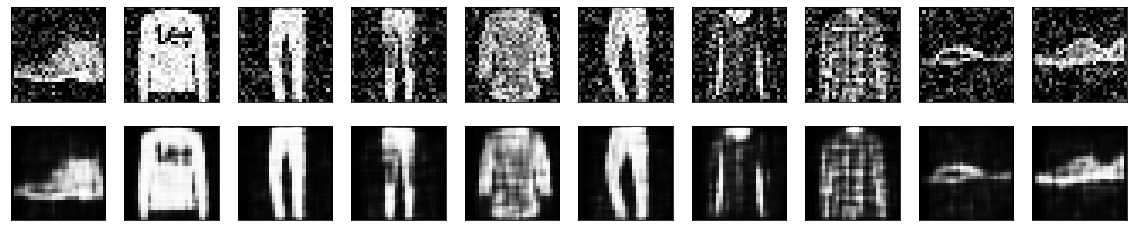

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)